In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data() 

In [3]:
X_test = X_test / 255
X_train = X_train / 255

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28))) 
model.add(keras.layers.Dense(20, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "sigmoid"))

model.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")


In [5]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 740us/step - accuracy: 0.7927 - loss: 0.6995
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.9319 - loss: 0.2370
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - accuracy: 0.9452 - loss: 0.1920
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - accuracy: 0.9490 - loss: 0.1756
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - accuracy: 0.9556 - loss: 0.1531
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.9564 - loss: 0.1479
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step - accuracy: 0.9595 - loss: 0.1387
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.9621 - loss: 0.1309
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - accuracy: 0.9649 - loss: 0.1207
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 720us/step - accuracy: 0.9662 - loss: 0.1146


In [6]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.9524 - loss: 0.1685


[0.1568426936864853, 0.9563999772071838]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step


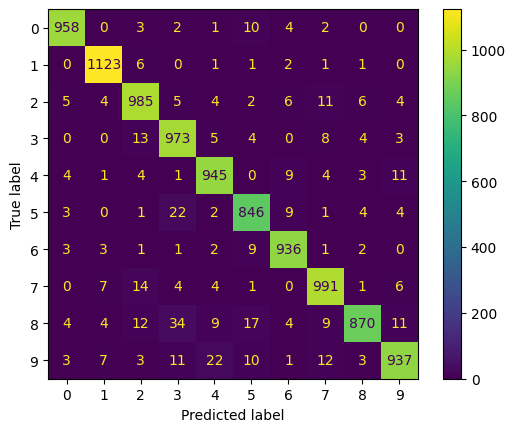

In [8]:
y_pred_probs = model.predict(X_test)  
y_pred_labels = np.argmax(y_pred_probs, axis=1)

if len(y_test.shape) > 1:
    y_true_labels = np.argmax(y_test, axis=1)
else:
    y_true_labels = y_test

cm = confusion_matrix(y_true_labels, y_pred_labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()